In [1]:
from src.data.data_loader import load_data
from src.data.data_cleaner import clean_data
import pandas as pd

df = clean_data(data=load_data(), data_source_name="kaggle_brisT1D")

In [2]:
from sktime.datasets import load_shampoo_sales
from sktime.split import temporal_train_test_split
from sktime.utils.plotting import plot_series

y = load_shampoo_sales()

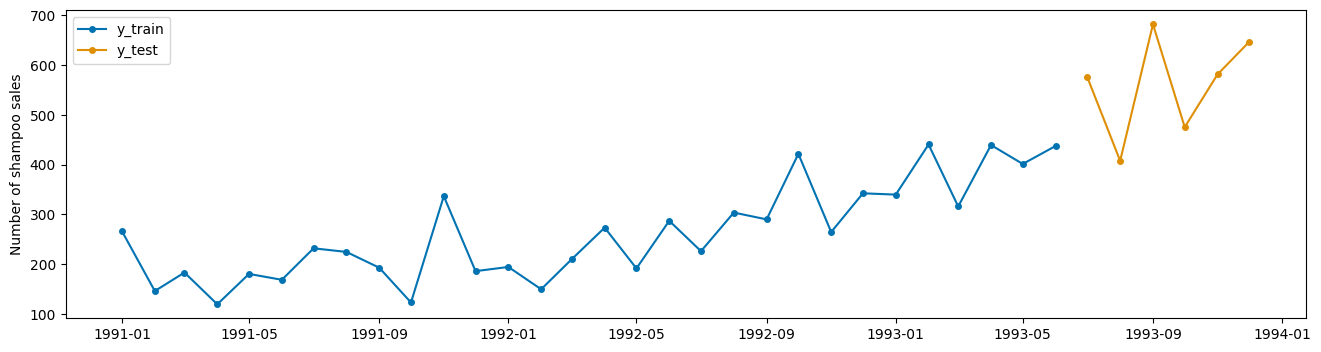

In [9]:
y_train_example, y_test_example = temporal_train_test_split(y=y, test_size=6)
plot_series(y_train_example, y_test_example, labels=["y_train", "y_test"]);

In [21]:
patient_1 = df[df["p_num"] == "p01"]
# patient_1.head(100)

In [ ]:
row_per_day = 12 * 24
day = 51

i_th_day = row_per_day * day
i_1_th_day = row_per_day * (day + -1)
p1_day_1 = patient_1.iloc[i_1_th_day:i_th_day]

y_train, y_test = temporal_train_test_split(y=p1_day_1["bg-0:00"], test_size=6 * 12)
plot_series(y_train, y_test, labels=["y_train", "y_test"]);

In [24]:
# Convert time column to datetime and extract time and hour components
patient_1_copy = df[df["p_num"] == "p01"].copy()

patient_1_copy["time"] = pd.to_datetime(patient_1_copy["time"]).dt.strftime("%H:%M:%S")
patient_1_copy["hour"] = pd.to_datetime(patient_1_copy["time"]).dt.hour

# Initialize variables
day_count = 0
prev_hour = None
patient_1_copy["day"] = 0

# Traverse rows one by one
for idx, row in patient_1_copy.iterrows():
    # Check if we transitioned from 5:xx to 6:xx
    if prev_hour == 5 and row["hour"] == 6:
        day_count += 1

    patient_1_copy.at[idx, "day"] = day_count
    prev_hour = row["hour"]

patient_1_copy.drop(columns=["hour"], inplace=True)

# Split data into list of daily dataframes
daily_dfs = []
for day in range(patient_1_copy["day"].max() + 1):
    daily_df = patient_1_copy[patient_1_copy["day"] == day].copy()
    daily_dfs.append(daily_df)

# Display first few rows of each daily dataframe
n = 2
print(f"Daily DataFrame {n}:")
print(daily_dfs[n].head())
print("\n")

/var/folders/lv/s2fdnq713td8c15d7dlzjk6c0000gn/T/ipykernel_49485/3282989196.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  patient_1_copy['time'] = pd.to_datetime(patient_1_copy['time']).dt.strftime('%H:%M:%S')
/var/folders/lv/s2fdnq713td8c15d7dlzjk6c0000gn/T/ipykernel_49485/3282989196.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  patient_1_copy['hour'] = pd.to_datetime(patient_1_copy['time']).dt.hour


Daily DataFrame 2:
          id p_num      time  bg-0:00  insulin-0:00  carbs-0:00  hr-0:00  \
178  p01_178   p01  06:05:00     13.5        0.0417         NaN      NaN   
179  p01_179   p01  06:20:00     13.4        0.0417         NaN      NaN   
180  p01_180   p01  06:35:00     13.1        0.0417         NaN      NaN   
181  p01_181   p01  06:50:00     12.9        0.0417         NaN      NaN   
182  p01_182   p01  07:05:00     12.9        0.0417         NaN      NaN   

     steps-0:00  cals-0:00 activity-0:00  day  
178         NaN        4.8           NaN    2  
179         NaN        4.8           NaN    2  
180         NaN        4.8           NaN    2  
181         NaN        4.8           NaN    2  
182         NaN        4.8           NaN    2  


